## <b>Linear Algebra (CpE210A)</b> 




#### <b>Laboratory 2: Plotting Vector using NumPy and MatPlotLib<b/>


Coded and submitted by: <br> *Surio,* *Rovil* *Jr.*, *M.* <br> *58010*

#### <b> Lab Exercises: <b/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [8]:
## START OF FUNCTION
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3) 
    lat = np.random.randint(-10,10, size=3)  
    
    dist1 = np.array([lat[0],long[0]])     ##arrays for each vector            
    dist2 = np.array([lat[1],long[1]])                  
    dist3 = np.array([lat[2],long[2]])                  

    dist_total = dist1 + dist2 + dist3 ##computation for resultant vector    
    disp = np.linalg.norm(dist_total)  ## The L2 Norm was used which is calculated as the square root-
                        ## -of the sum of the squared vector values and executed using function np.linalg.norm
    alpha = 10**-6 
    theta = np.arctan(dist_total[1]/(dist_total[0]+alpha)) ##Computation for angle of displacement 
    theta = np.degrees(theta)                             ##converting rad to degrees
    
    ## Plotting the PH Eagle flight vectors.
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    
    plt.quiver(0,0, dist1[0], dist1[1], 
                angles='xy', scale_units='xy',scale=1, color='red', 
                label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
                angles='xy', scale_units='xy',scale=1, color='blue',
                label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
                dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
                label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
                angles='xy', scale_units='xy',scale=1, color='orange',
                label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()
    
## END OF FUNCTION  



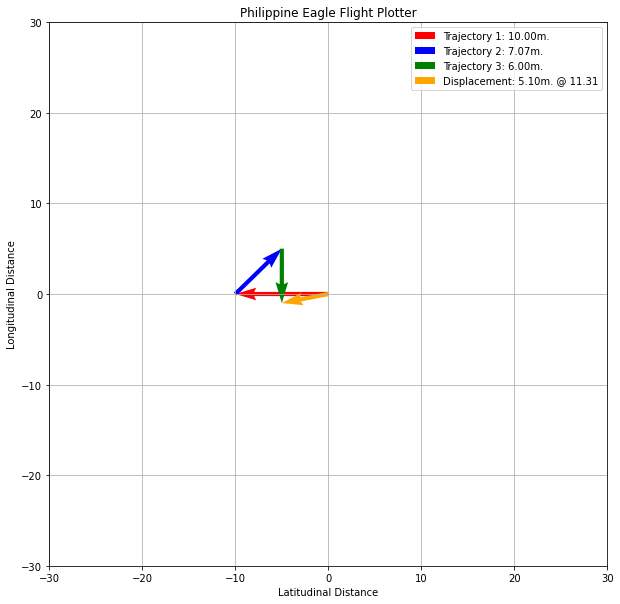

In [9]:
track_eagle(make_figs=False) ## Let 'make_figs' equal to False during debugging.



#### <b> Guide Question: <b/>

What is the use of the variable α?

    The alpha was was added to prevent the value being divided to 0 which will cause an error.
    
Kindly explain the process of plotting the eagle flight vectors.
    
    In plotting the eagle flight vectors, starting from plt.quiver, the first 2 parameters "0,0" was for the tail of the first vector or the origin. It was followed by the dist1[0], dist1[1] which for getting the x and y of vector 1 or arrowhead. for the next code which are the angles='xy', scale_units='xy',scale=1, color='red', this is for the modification of ho Then, for this line of code > label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1))) it represents the little box(legend) in the right top corner that shows the magnitude of each vector and degree. 
    
    For the 2nd plt.quiver, it's almost the same with the first but the origin of this 2nd vector was pointed into the head of the first vector or dist1[0], dist1[1]. The code that follows this code is the same as how it works from the first vector. For the last vector, the origin or the head was identified by adding the dist1[0],dist2[0] for the x-axis, and adding the dist1[1],dist2[1] for its y-axis. After that, it plotted the generated values from dist3 and placed it to the computed origin. Lastly, the resultant of the vector was plotted by using the dist_total variable that holds an array of total dist1,dist2, and dist 3 or the (dist_total[0], dist_total[1]). Then, the set origin for the dist_total was 0,0 to be followed by the codes that work on what is displayed on the legend which is the variable "disp" which is equal to the computed magnitude of displacement and the variable "theta" that holds the degree. The plt.legend() is the one that shows the little box on the top right corner or legend of the cartesian or canvas. Lastly, the plt.show is the one showing what is inside the plt or the vectors plotted in the canvas.

Provide a flow chart describing the 'track_eagle' function. 


    
![alt text](EAGLE.jpeg "Philippine Eagle Flight Plotter")


<b> The function below is for computation of eagle__kinematics specifically, the total distance traveled by eagles <b/>

<b>Equations:<b/>
    
For distance: $$distance = (velocity)(time)$$ 
For dist_total1, dist_total2, and dist_total3: $$TotalDistance = distance1 + distance2 + ...$$ 

In [94]:
def eagle_kinematics(velocity, eagle_time):
    req_shape = 4 ;                      ##set an array with 4 elements
    shape3 = np.zeros((req_shape-1,));  ##creates  [0.0.0.] from 4 zeros to minus 1 
    shape2 = np.zeros((req_shape-2,))   ##creates  [0.0.] from 4 zeros to minus 2
    eagle_time = np.array([t**3, t**2, t, 1]); ##t=2 : [8 4 2 1]
    if velocity.shape == (req_shape,):         ##checks if the two arrays are equal
        velocity2 = np.array([3*velocity1[0],2*velocity1[1], velocity1[2]]) ##[6 2 3]
        velocity3 = np.array([2*velocity2[0],velocity2[1]])                ##[12 2]
        dist_total1 = np.sum(np.multiply(velocity1, eagle_time)) ;   ##sum of [8 4 2 1] x [2 1 3 2] = 28
        dist_total2 = np.sum(np.multiply(velocity2, eagle_time[1:])); ##sum of [4 2 1] x [6 2 3] = 31
        dist_total3 = np.sum(np.multiply(velocity3, eagle_time[2:])); ##sum of [2 1] x [12  2] = 26
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is equal ({req_shape},)')
    
    return dist_total1, dist_total2, dist_total3  ##returns 28,31,26



In [95]:
velocity1 = np.array([2,1,3,2])                                                                                        
t = 2                                                                                                                  
eagle_kinematics(velocity1, t)                                    

(28, 31, 26)

#### <b> Guide Question: <b/>


What is the function for? Explain the inputs, process, functions used, and the outputs.

    The function was for computation for a distance traveled by the eagle. req_shape was used to set a 1-dimensional array with 4 elements and the shape3 created or return a 1-dimensional array that contains 3 zeros in float [0.0.0.] which is because of req_shape being minus by 1 that's why it results to an array with 3 elements. The same process for shape2, but this time, the req_shape being minus by 2 and return an array with 2 elements of zero in float [0.0.]. The arrays should equal to the shapes created so that the operations would work properly because the shapes of array must equal to one another to perform operations like multiplication. For "eagle_time", a list was created with 4 elements first by raising the number that was assigned for this particular project = 2. So the "the eagle_time" variable which is the first array results to [8 4 2 1]. Next for the "if velocity.shape == (req_shape)" this checks if the number of elements from req-shape(contains 4) and velocity.shape(also contains 4) is equal to each other. The velocity contains 4 elements because the values of "velocity1" were passed to it when the eagle_kinematics was called since the velocity1 is one of the argument in calling the function.
    
    Proceeding to the "velocity2 = np.array([3*velocity1[0],2*velocity1[1], velocity1[2]])" since the velocity1 array contains 2,1,3,2 the values were accessed using their indexes and perform the operation which results to velocity2 with [6 2 3]. Then the values from velocity2 were accessed using the same method and were used into creating the array of velocity3 by performing the assigned operation from a said variable which results in [12 2]. As of now, it can be observed that the arrays following the format from req_shape, shape3, and shape2.
    
    In computing the final output, multiplying the velocity1 [2 1 3 2] to eagle_time [8 4 2 1] and adding the result it gives 28 for the first total distance. For the second total distance, the same method was used in which velocity2 [6 2 3] multiplied to eagle_time [1:] means starting from index 1 of [8 4 2 1] so it was multiplied to [4 2 1] and adding the result gives 31. Lastly, total distance 3 was computed by multiplying velocity3 [12 2 ] and the eagle_time [2:] which have [2 1], and adding the result gives 26. Finally, The three values computed was returned to the function then if the function was called, these three values will be the output


Equations

  For distance: $$distance = (velocity)(time)$$ 
  For dist_total1, dist_total2, and dist_total3: $$Total Distance = distance1 + distance2 + ...$$ 

   




In [761]:
## START OF FUNCTION
def month_profit_trace(profit, reach, make_figs=True): 
    if (profit.shape == (4,)) and (fbpost_reach.shape == (4,)): #checks if the number of elements are equal
        week1 = np.array((fbpost_reach[0], profit[0]))   ##arrays for each vector     
        week2 = np.array((fbpost_reach[1], profit[1]))
        week3 = np.array((fbpost_reach[2], profit[2]))
        week4 = np.array((fbpost_reach[3], profit[3]))
        
        week_total = week1 + week2 + week3 + week4   ##computation for resultant vector
        week_performance = np.linalg.norm(week_total) ##computation for magnitude of displacement
        alpha = 10**-6 
        fbpost_reach_gradient = np.arctan(week_total[1]/(week_total[0]+alpha))##Computation for angle of displacement
        fbpost_reach_gradient = np.degrees(fbpost_reach_gradient) ##converting to degrees
        ## Plotting the Bebang's Month Post Efficiency
        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        n = 2 
        plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        plt.quiver(week1[0], week1[1], week2[0], week2[1],
                   angles='xy', scale_units='xy',scale=1, color='green', width=0.0025,
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        plt.quiver(np.add(week1[0], week2[0]), np.add(week1[1], week2[1]), week3[0], week3[1],
                   angles='xy', scale_units='xy',scale=1, color='blue', width=0.0025,
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        plt.quiver(week1[0] + week2[0] + week3[0], week1[1] + week2[1] + week3[1], week4[0], week4[1],
                   angles='xy', scale_units='xy',scale=1, color='orange', width=0.0025,
                   label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))

        plt.quiver(0,0, week_total[0], week_total[1], 
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                   label='Efficiency: {:.2f}m. @ {:.2f}'.format(week_performance, fbpost_reach_gradient))
        
        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(fbpost_reach_gradient)}.png', dpi=300)
            
        plt.show()
    else:
        print('Profit and reach dimention are not equal') 

## END OF FUNCTION  



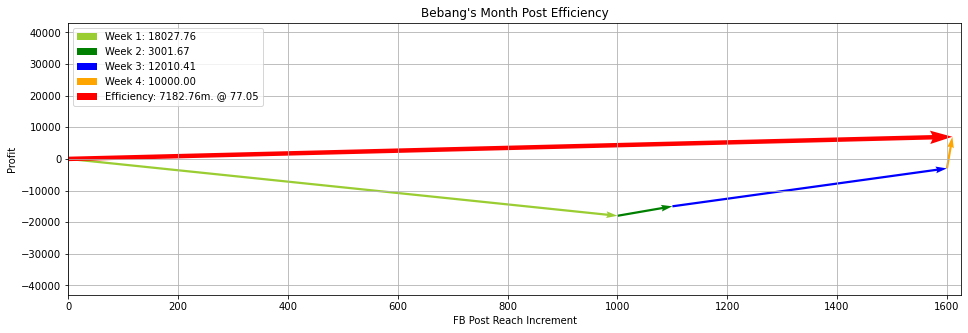

In [762]:
profit= np.array([-18000, 3000, 12000, 10000 ])   ##Original Values:-18000, 3000, 12000, 10000 
fbpost_reach = np.array([1000, 100, 500, 10 ])    ##Original Values: 1000, 100, 500, 10  

month_profit_trace(profit, fbpost_reach, make_figs=False) 



#### <b> Guide Question: <b/>

What is the relationship between the FB post reach and the profit?
    
    The FB post reach and the profit relationship is that they are both needed to compute the efficiency of Bebang's Month post. So the FB post reach and the profit is directly proportional to the efficiency of Bebang's Month post. This is evident when changed the values of either FB post reach or profit into lower values for example, the efficiency will also lowers.
    
Why is profit in the y-axis and FB post reach on the x-axis and not the other way around?
    
    The profit must be in y-axis and the FB post reach on the x-axis because the result of the graph will be different and will not show properly the plots of it as can be observed in the figure below.
![alt text](FB_POST_Y-AXIS.jpg "The FB post in y-axis and Profit on x-axis")
    

Kindly explain the process of plotting the post efficiency vectors.
    
    The plotting of vectors is similar to cell 1. The 2 arrays namely 'profit' and 'fbpost_reach' serves as the values for Week 1 to 4 by making an ordered pair from it. Using the plt.quiver, the ordered pair was accessed and plotted accordingly to the set origin and the values. The first vector was plotted using plt.quiver(0,0, week1[0], week1[1]) which means the first value is the origin and the second and third are the x and y values. Followed by the second vector using the same concept used in plotting the first vector. For the third, the origin was identified by adding the vectors of the first and second. Also for the fourth vector, the origin comes from adding the three previous vectors. Lastly, plotting the week_total with 0,0 origin and getting the first and second index of it for x and y.

Provide a necessary equations that are representative to finding the performance week and reach gradient.

Performance week: $\sqrt{weektotal[0]^2 + weektotal[1]^2}$
reach gradient: $arctan$ $\frac{weektotal[1]}{weektotal[0]+alpha}$

Try to alter the 'reach' and 'profit' values to display different scenarios. Save at least 3 scenarios then append and discuss the figures in your report.

    First scenario - lower profit = lower efficiency <br>
    Second scenario – higher profit = higher efficiency <br>
    Third scenario – lower fbpost_reach = lower efficiency <br>
    Fourth scenario – higher fbpost_reach = higher efficiency 

What can be observed and concluded with the behavior of the vectors with respect to post efficiency?
    
    In Changing the values of vectors, it can be observed and concluded that the post efficiency are directly proportional to the vectors since whenever the values from the vectors lower the value of efficiency also lowers the same with providing higher value for vectors, the efficiency also increased.
